In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
us_data = pd.read_csv('amazon_prices_us.csv')
uk_data = pd.read_csv('amazon_prices_uk.csv')
de_data = pd.read_csv('amazon_prices_de.csv')

gbp_to_usd = 1.35 # pound per dollar
eur_to_usd = 1.13 # euro per dollar


### Purchasing power parity
$$
X_i = P_{i,a} / P_{i, b}
$$
Where X is the PPP implied exchange rate, i the basket, a and b are the two countries, P the price
$$
XP_i = Fx_{a,b} - X_i
$$
the PPP premium is the implied FX rate by the basket of good minus the spot fx rate

### Purchasing power parity
For a given basket of good, the cost in country i is $C_i$. We define consumer product implied parity as
$$
Parity_{i,j} = \frac{C_i}{C_j \cdot Fx_{j,i}} - 1
$$
And the signal we use to proxy PPP in each country is
$$
Signal_c = \sum_i Parity_{c, i}
$$

In [4]:
### Purchasing power parity

In [5]:
baskets = us_data['Category'].unique()

In [6]:
baskets

array(['Food and Beverage', 'Household Items', 'Personal Care',
       'Pet Supplies', 'Health and Wellness', 'Appearal', 'Electronics',
       'Books and Media', 'Sports and Outdoors', 'Toys and Games',
       'Gardening Supplies', 'Automotive Supplies',
       'Household Appliances', 'Office Supplies'], dtype=object)

In [7]:
uk_us_ppp = {}
de_us_ppp = {}
uk_de_ppp = {}
for b in baskets:
    us_prices = us_data[us_data['Category'] == b]['Price'] # dollar per commodity 
    uk_prices = uk_data[uk_data['Category'] == b]['Price']
    de_prices = de_data[de_data['Category'] == b]['Price']

    us_avg = us_prices.mean()
    uk_avg = uk_prices.mean() * gbp_to_usd
    de_avg = de_prices.mean() * eur_to_usd

    implied_gbp_usd = uk_avg / us_avg  - 1# pound per dollar
    implied_eur_usd = de_avg / us_avg  - 1# euro per dollar
    # implied_gbp_eur = de_avg / uk_avg # euro per pound

    uk_us_ppp[b] = implied_gbp_usd
    de_us_ppp[b] = implied_eur_usd
    # uk_de_ppp[b] = implied_gbp_eur - (gbp_to_usd / eur_to_usd)    


/var/folders/ld/776wkv1x7j163s0ynxr2xqq00000gn/T/ipykernel_88510/2161454967.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(categories, fontsize=14, fontweight='bold')
/var/folders/ld/776wkv1x7j163s0ynxr2xqq00000gn/T/ipykernel_88510/2161454967.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(categories, fontsize=14, fontweight='bold')


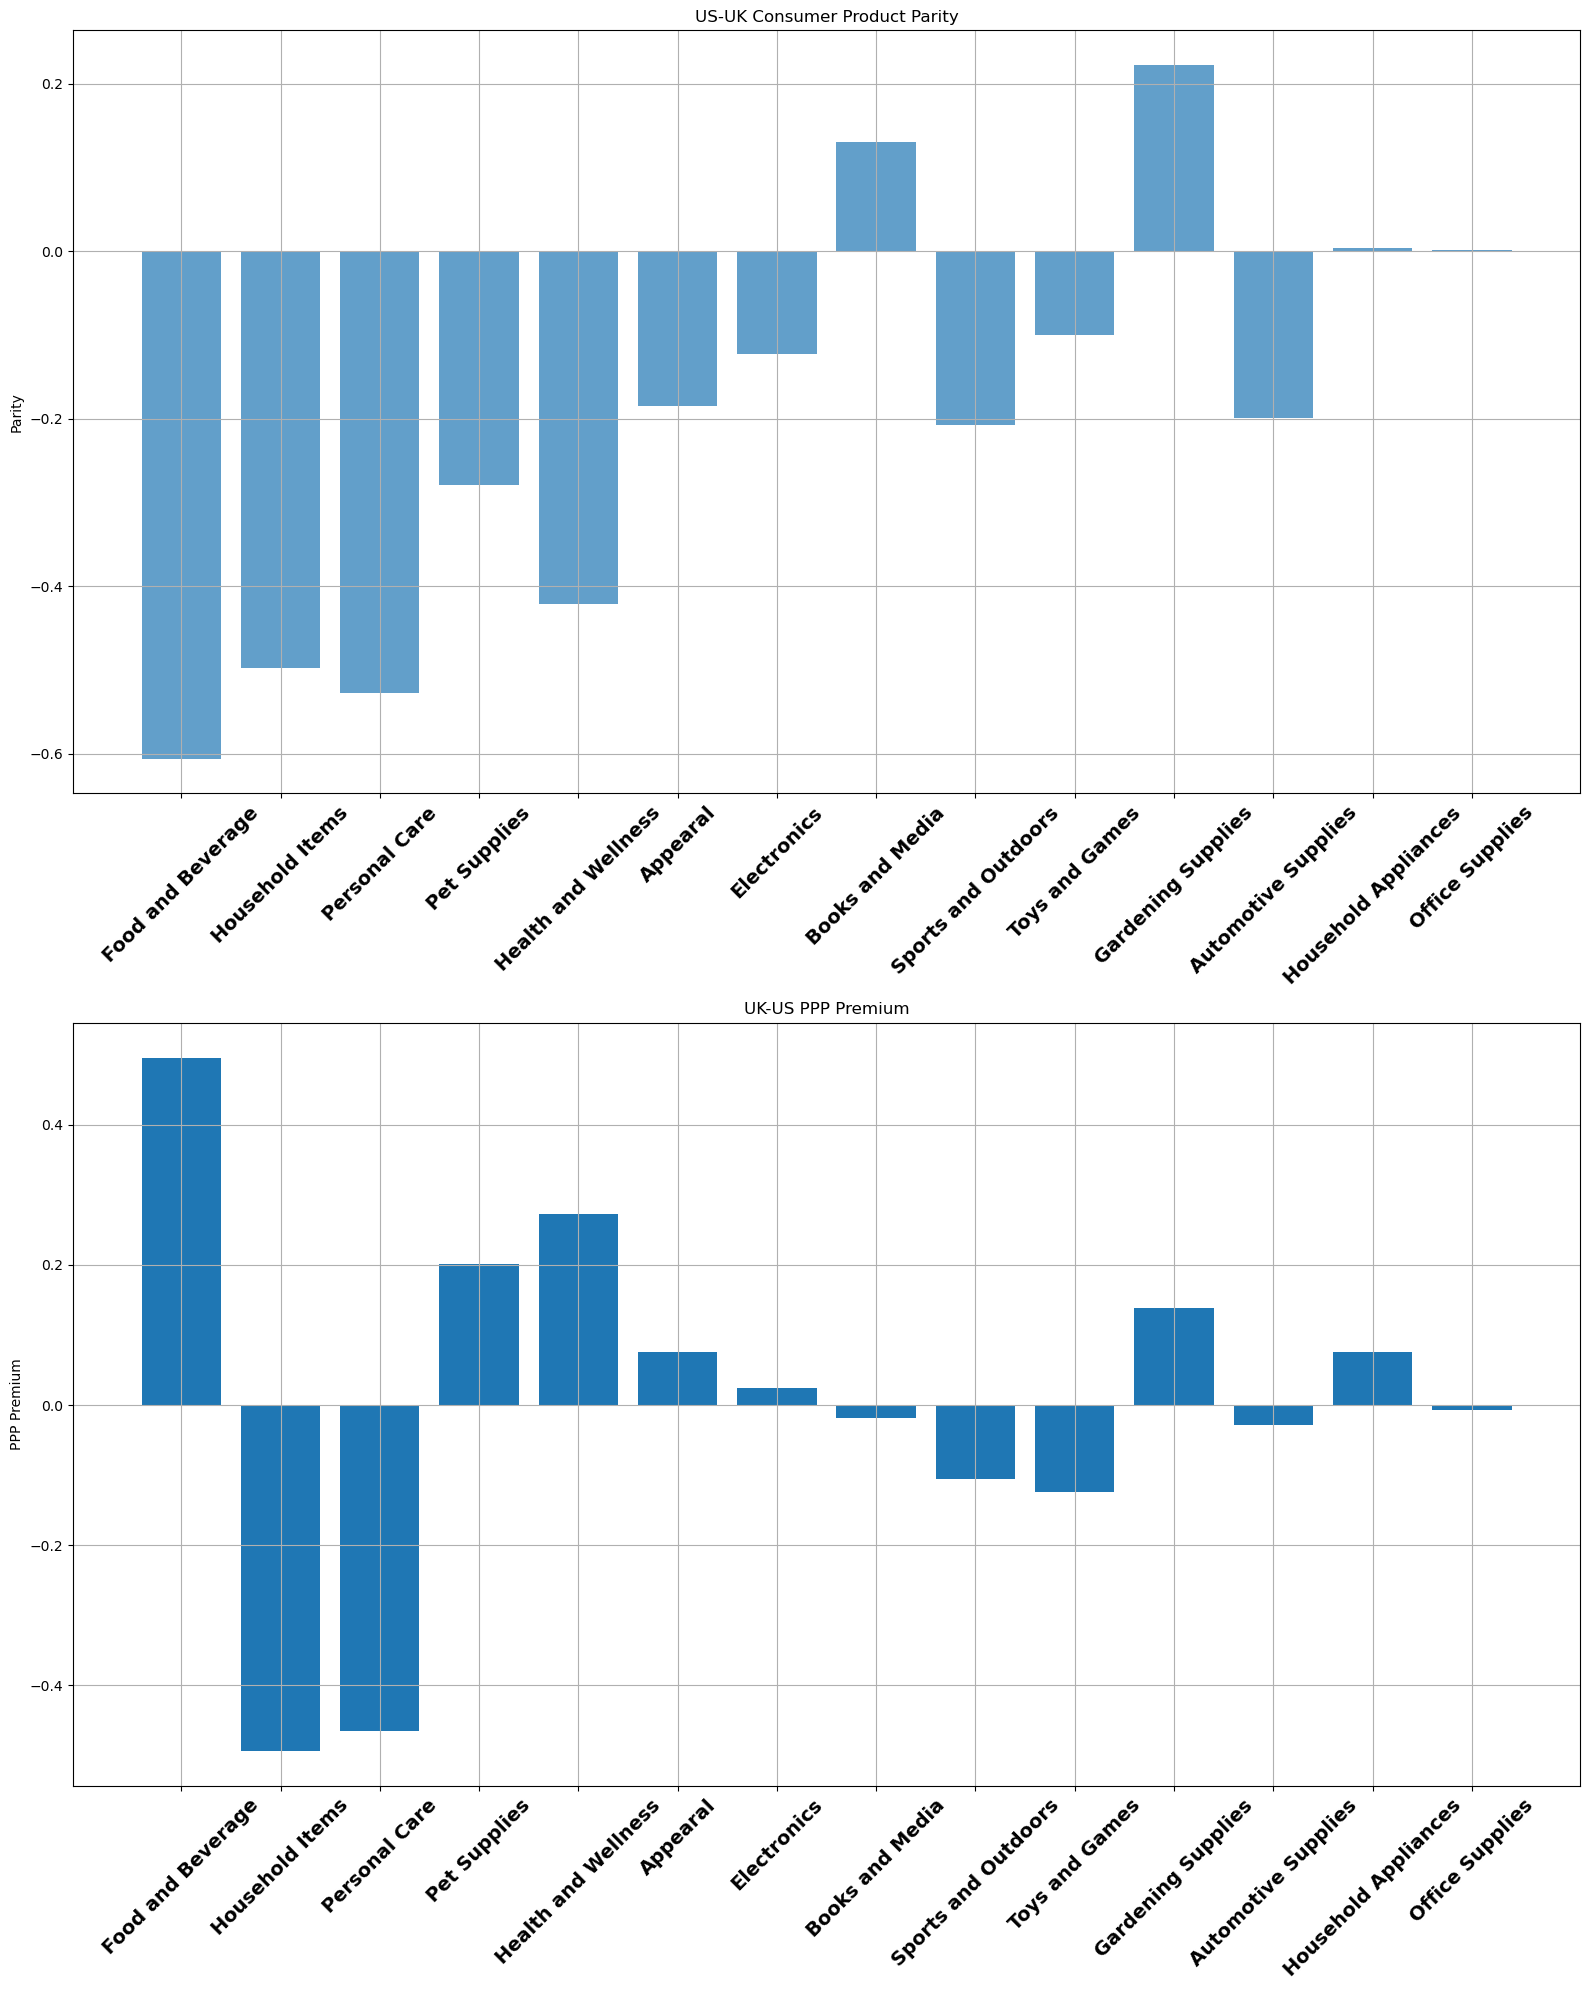

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 20))

# UK-US PPP
categories = list(uk_us_ppp.keys())
uk_values = list(uk_us_ppp.values())
de_values = list(de_us_ppp.values())

ax1.bar(categories, uk_values, label='UK-US PPP', alpha=0.7)
# ax1.bar(categories, de_values, bottom=uk_values, label='DE-US PPP', alpha=0.7)
ax1.set_title('US-UK Consumer Product Parity')
ax1.set_ylabel('Parity')
ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.set_xticklabels(categories, fontsize=14, fontweight='bold')
# ax1.legend()

# Individual UK-US PPP
ax2.bar(categories, de_values)
ax2.set_title('UK-US PPP Premium')
ax2.set_ylabel('PPP Premium')
ax2.tick_params(axis='x', rotation=45, labelsize=14)
ax2.set_xticklabels(categories, fontsize=14, fontweight='bold')
# ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# # UK-DE PPP
# categories = list(uk_de_ppp.keys())
# values = list(uk_de_ppp.values())
# ax3.bar(categories, values)
# ax3.set_title('UK-DE PPP Premium')
# ax3.set_ylabel('PPP Premium')
# ax3.tick_params(axis='x', rotation=45)
# ax3.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax1.grid()
ax2.grid()
# ax3.grid()
plt.tight_layout()
plt.savefig('us_uk_de_ppp.png', dpi=300)
plt.show()

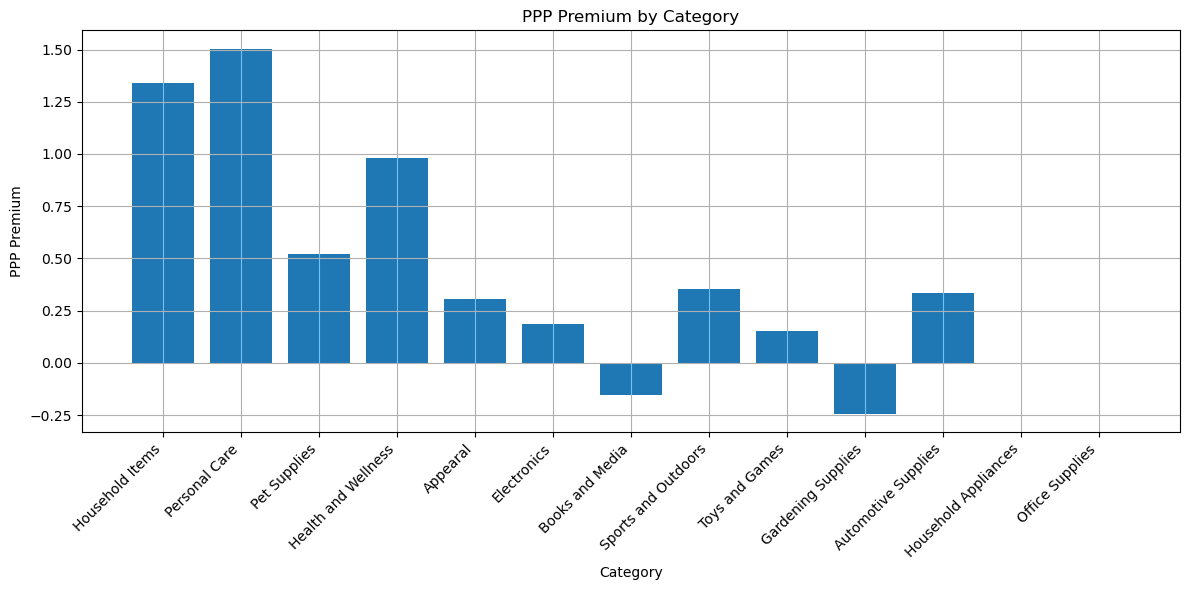

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# UK-US PPP
categories = list(uk_us_ppp.keys())
values = list(uk_us_ppp.values())
ax1.bar(categories, values)
ax1.set_title('UK-US PPP Premium')
ax1.set_ylabel('PPP Premium')
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# DE-US PPP
categories = list(de_us_ppp.keys())
values = list(de_us_ppp.values())
ax2.bar(categories, values)
ax2.set_title('DE-US PPP Premium')
ax2.set_ylabel('PPP Premium')
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# UK-DE PPP
categories = list(uk_de_ppp.keys())
values = list(uk_de_ppp.values())
ax3.bar(categories, values)
ax3.set_title('UK-DE PPP Premium')
ax3.set_ylabel('PPP Premium')
ax3.tick_params(axis='x', rotation=45)
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [14]:
implied_eur_usd

1.1383327165911794

In [15]:
implied_gbp_eur

1.1850523799479717